In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



DOWNLOAD_PATH = "https://raw.githubusercontent.com/JesusNoelValMo/Machine_Learning_Book/master/Chapter_4_Training_Models/Exercises/high_diamond_ranked_10min.csv"

In [8]:
def load_csv(path):
  return pd.read_csv(path)

In [9]:
data_ = load_csv(DOWNLOAD_PATH)
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [10]:
from sklearn.model_selection import  StratifiedShuffleSplit
from sklearn.model_selection import  train_test_split
corr_matrix = data_.corr()
#print(corr_matrix["blueWins"].sort_values(ascending=False))
#Separate labels and features
y_bluewins = data_["blueWins"]
X_features = data_[["blueTotalGold", "blueAvgLevel", "blueKills", "blueAssists", "blueTotalMinionsKilled", "blueDragons", "blueTotalJungleMinionsKilled"]] #Let's take only some attributes
#Split to have train and test data
X_features_train, X_features_test, y_bluewins_train, y_bluewins_test = train_test_split(X_features, y_bluewins, test_size=0.2)




In [81]:
#Let's Scale our data!
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_features_train_scaled = scaler.fit_transform(X_features_train)
X_features_test_scaled = scaler.fit_transform(X_features_test)
X_features_test_scaled.shape

(1976, 7)

#**BATCH GRADIENT DESCENT**

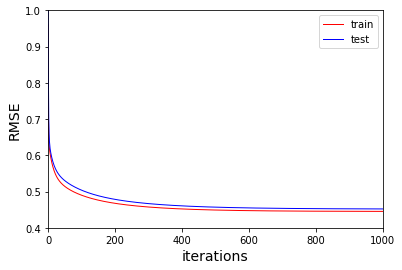

Thetas using Batch gradient descent: [[-0.69640692]
 [ 0.62338259]
 [ 0.63204376]
 [ 0.30343435]
 [ 0.1919261 ]
 [ 0.28890382]
 [ 0.12916812]
 [ 0.21719963]]
Thetas using Normal Equation: [[-0.7316792 ]
 [ 1.06671743]
 [ 0.52238691]
 [ 0.16060331]
 [ 0.04679213]
 [ 0.294723  ]
 [ 0.1294379 ]
 [ 0.19720438]]


In [124]:
#First, add a bias parameter X0 = 1
from sklearn.metrics import mean_squared_error

X_features_w_bias = np.c_[np.ones((7903,1)), X_features_train_scaled]
X_features_w_bias_test = np.c_[np.ones((1976,1)), X_features_test_scaled]

eta = 0.1 #Learning Rate
n_iterations = 1000
m = 7903
epsilon =  0.454  #Tolerance 

theta = np.random.randn(8,1)
y_for_iters = y_bluewins_train.to_numpy().reshape(m,1)
iterations = 0
train_errors, test_errors = [], []

for iteration in range(n_iterations):
  gradients = 2/m * X_features_w_bias.T.dot(X_features_w_bias.dot(theta) - y_for_iters)
  theta = theta - eta * gradients
  iteration += 1

  #Plot predictions 
  train_predictions = X_features_w_bias.dot(theta)
  test_predictions = X_features_w_bias_test.dot(theta)

  train_errors.append(mean_squared_error(y_bluewins_train, train_predictions))
  test_errors.append(mean_squared_error(y_bluewins_test, test_predictions))
  if mean_squared_error(y_bluewins_train, train_predictions) > epsilon:
    pass

plt.plot(np.sqrt(train_errors), "r-", linewidth=1, label="train")
plt.plot(np.sqrt(test_errors), "b-", linewidth=1, label="test")
plt.legend(loc="upper right")
plt.xlabel("iterations", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.axis([0,1000,0.4,1.0])
plt.show()

print(f'Thetas using Batch gradient descent: {theta}')
#For compare purpose, let's compute thetas by the normal equation
theta_norm_eq = np.linalg.inv(X_features_w_bias.T.dot(X_features_w_bias)).dot(X_features_w_bias.T).dot(y_for_iters)
print(f'Thetas using Normal Equation: {theta_norm_eq}')


In [132]:
#Let's apply confussion matrix to analyze
from sklearn.metrics import confusion_matrix
one_zero_train_redictions = (train_predictions>1)
confusion_matrix(one_zero_train_redictions, y_bluewins_train)

array([[3969, 3823],
       [   3,  108]])